In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# FISH fieldmesh

In [2]:
from superfish.parsers import parse_fish_t7
from superfish.writers import fish_externalfield_data

from pmd_beamphysics import FieldMesh

import numpy as np
import os

In [3]:
T7FILE = 'data/SWIFEL.T7'
t7data = parse_fish_t7(T7FILE)
t7data

{'geometry': 'cylindrical',
 'problem': 'fish',
 'zmin': 50.0,
 'zmax': 70.0,
 'nz': 100,
 'freq': 175.715180667,
 'rmin': 0.0,
 'rmax': 3.0,
 'nr': 20,
 'Ez': array([[3.02739133e+01, 3.02278814e+01, 3.00948875e+01, ...,
         8.80424503e-07, 6.76036685e-07, 5.21243433e-07],
        [3.02880937e+01, 3.02411865e+01, 3.01061286e+01, ...,
         8.73490637e-07, 6.74490406e-07, 5.17212368e-07],
        [3.03309919e+01, 3.02812936e+01, 3.01393566e+01, ...,
         8.83434304e-07, 6.76334854e-07, 5.20331109e-07],
        ...,
        [3.22323840e+01, 3.16224100e+01, 3.10386473e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.22017542e+01, 3.15850941e+01, 3.09952313e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.21545950e+01, 3.15327255e+01, 3.09379688e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 'Er': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+0

In [4]:
DATA=fish_externalfield_data(t7data)

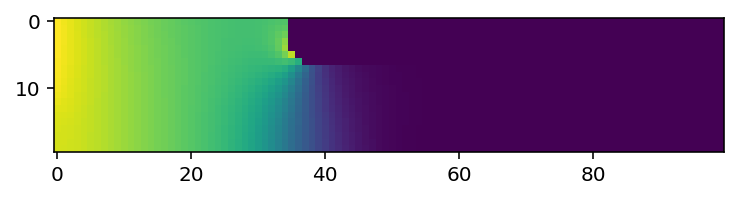

In [5]:
plt.imshow(np.flipud(t7data['E']))

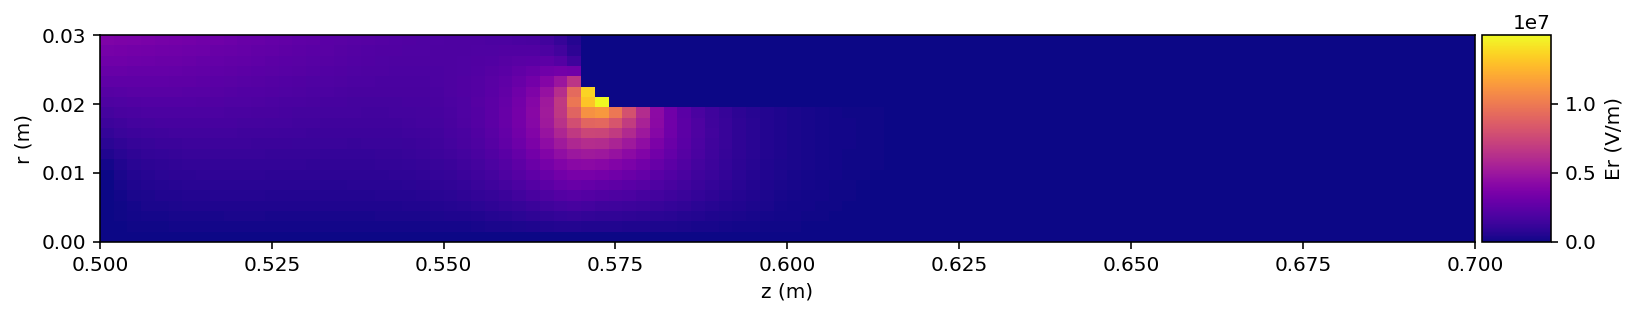

In [6]:
FM = FieldMesh(data=DATA)
FM.plot('Er', aspect='equal', figsize=(13,10))

In [7]:
FM.write_superfish('fish.t7', verbose=True)

Superfish T7 file 'fish.t7' written for Fish problem.


'fish.t7'

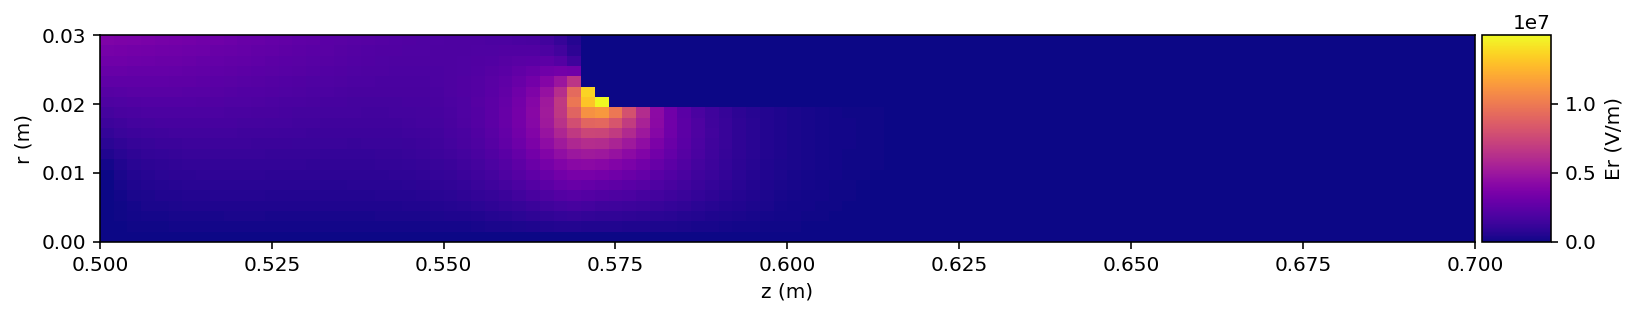

In [8]:
t7data2 = parse_fish_t7('fish.t7')
DATA2=fish_externalfield_data(t7data2)
FM2 = FieldMesh(data=DATA)
FM2.plot('Er', aspect='equal', figsize=(13,10))

In [9]:
FM2==FM

True

In [10]:
FM.Btheta

array([[[0.+0.00000000e+00j, 0.+0.00000000e+00j, 0.+0.00000000e+00j,
         ..., 0.+0.00000000e+00j, 0.+0.00000000e+00j,
         0.+0.00000000e+00j]],

       [[0.-2.93667901e-04j, 0.-2.93217281e-04j, 0.-2.91917745e-04j,
         ..., 0.-8.45660933e-12j, 0.-6.54895132e-12j,
         0.-5.01960424e-12j]],

       [[0.-5.87748301e-04j, 0.-5.86821058e-04j, 0.-5.84157776e-04j,
         ..., 0.-1.69959914e-11j, 0.-1.30425853e-11j,
         0.-1.00710749e-11j]],

       ...,

       [[0.-5.24894772e-03j, 0.-5.17034565e-03j, 0.-5.09242348e-03j,
         ..., 0.+0.00000000e+00j, 0.+0.00000000e+00j,
         0.+0.00000000e+00j]],

       [[0.-5.56490315e-03j, 0.-5.47910399e-03j, 0.-5.39444365e-03j,
         ..., 0.+0.00000000e+00j, 0.+0.00000000e+00j,
         0.+0.00000000e+00j]],

       [[0.-5.87975016e-03j, 0.-5.78677474e-03j, 0.-5.69538572e-03j,
         ..., 0.+0.00000000e+00j, 0.+0.00000000e+00j,
         0.+0.00000000e+00j]]])

## Check

In [11]:
for key in t7data:
    same = np.all(t7data2[key] == t7data[key])
    print(key, same)
    if key == 'E': # skip, see below
        continue
    assert same


geometry True
problem True
zmin True
zmax True
nz True
freq True
rmin True
rmax True
nr True
Ez True
Er True
E False
Hphi True


(<matplotlib.image.AxesImage at 0x7fa75f564d60>,
 -1.0000000116860974e-07,
 1.0000000116860974e-07)

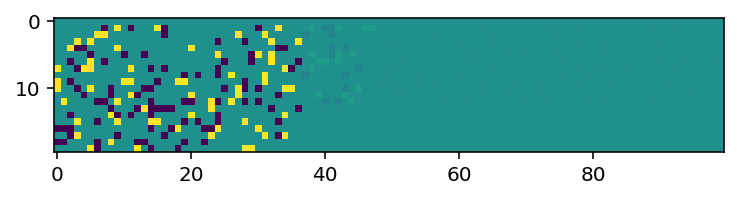

In [12]:
# The |E| seems to lose a little precision. 
diff = t7data['E']-t7data2['E']
plt.imshow(diff), diff.min(), diff.max()

# Poisson T7 Fieldmaps

Similar to above. Note that 'magnetic' or 'electric' types need to be specified when reading.

In [13]:
from superfish.parsers import parse_poisson_t7
from superfish.writers import poisson_externalfield_data

In [14]:
t7data = parse_poisson_t7('data/SOLENOID.T7', type='magnetic')
t7data

{'geometry': 'cylindrical',
 'problem': 'poisson',
 'rmin': 0.0,
 'rmax': 10.0,
 'nr': 101,
 'zmin': -10.0,
 'zmax': 10.0,
 'nz': 201,
 'Br': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.86021515e-01, -1.98228061e-01, -2.11251068e-01, ...,
          7.49773275e-02,  6.29602082e-02,  5.27890059e-02],
        [-3.71423187e-01, -3.95717017e-01, -4.21660917e-01, ...,
          1.48339954e-01,  1.24479362e-01,  1.04323819e-01],
        ...,
        [-6.12408550e-01, -6.14433676e-01, -6.16085207e-01, ...,
          1.11626967e-10,  1.09118721e-10,  9.46532222e-11],
        [-5.93518361e-01, -5.95267418e-01, -5.96652761e-01, ...,
          1.07262393e-10,  1.06662983e-10,  9.44868550e-11],
        [-5.75270091e-01, -5.76763994e-01, -5.77905326e-01, ...,
          1.02103807e-10,  1.03393157e-10,  9.30441005e-11]]),
 'Bz': array([[ 7.65959886e+00,  8.04374917e+00,  8.45329421e+00, ...,
          8.72354

In [15]:
DATA=poisson_externalfield_data(t7data, type='magnetic')

In [16]:
FM = FieldMesh(data=DATA)

In [17]:
FM.max

array([0.1, 0. , 0.1])

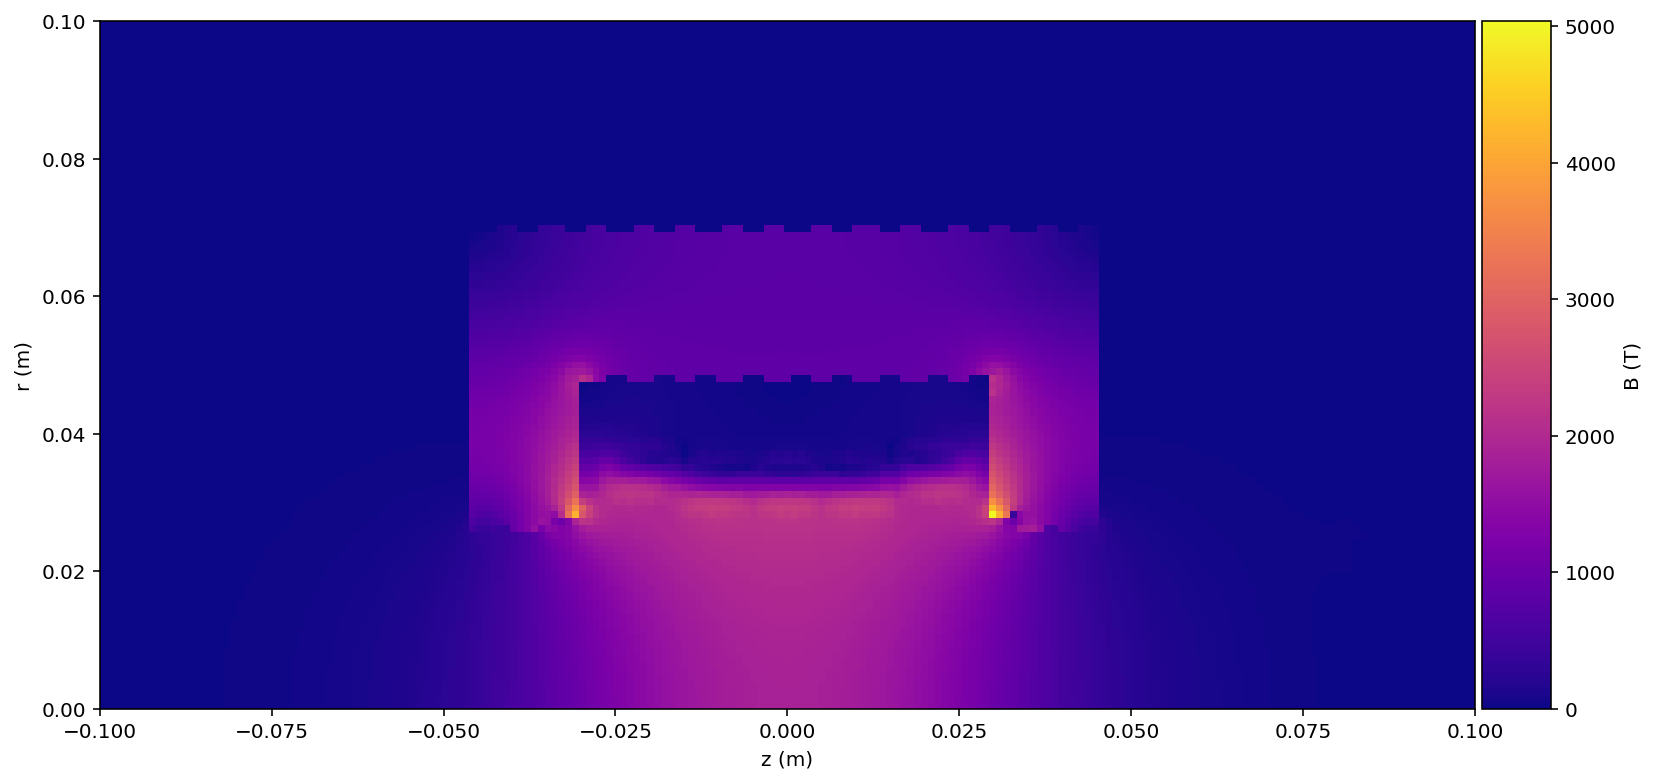

In [18]:
FM.plot('B', aspect='equal', figsize=(13,10))

In [19]:
FM.write_superfish('poisson.T7', verbose=True)

Superfish T7 file 'poisson.T7' written for magnetic Poisson problem.


'poisson.T7'

In [20]:
FM.write('solenoid.h5')

In [21]:
t7data2 = parse_poisson_t7('poisson.T7', type='magnetic')
t7data2

{'geometry': 'cylindrical',
 'problem': 'poisson',
 'rmin': 0.0,
 'rmax': 10.0,
 'nr': 101,
 'zmin': -10.0,
 'zmax': 10.0,
 'nz': 201,
 'Br': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.86021515e-01, -1.98228061e-01, -2.11251068e-01, ...,
          7.49773275e-02,  6.29602082e-02,  5.27890059e-02],
        [-3.71423187e-01, -3.95717017e-01, -4.21660917e-01, ...,
          1.48339954e-01,  1.24479362e-01,  1.04323819e-01],
        ...,
        [-6.12408550e-01, -6.14433676e-01, -6.16085207e-01, ...,
          1.11626967e-10,  1.09118721e-10,  9.46532222e-11],
        [-5.93518361e-01, -5.95267418e-01, -5.96652761e-01, ...,
          1.07262393e-10,  1.06662983e-10,  9.44868550e-11],
        [-5.75270091e-01, -5.76763994e-01, -5.77905326e-01, ...,
          1.02103807e-10,  1.03393157e-10,  9.30441005e-11]]),
 'Bz': array([[ 7.65959886e+00,  8.04374917e+00,  8.45329421e+00, ...,
          8.72354

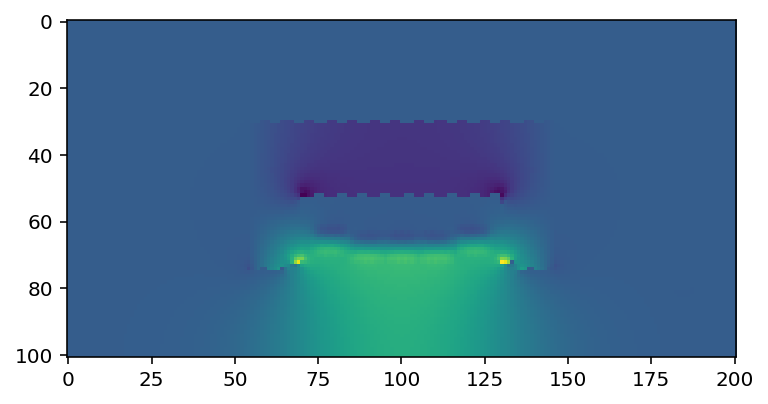

In [22]:
plt.imshow(np.flipud(t7data['Bz']))

In [23]:
for key in t7data:
    same = np.all(t7data2[key] == t7data[key])
    print(key, same)
    assert same
    

geometry True
problem True
rmin True
rmax True
nr True
zmin True
zmax True
nz True
Br True
Bz True


# Cleanup

In [24]:
os.remove('fish.T7')
os.remove('poisson.T7')
os.remove('solenoid.h5')